# FIXME / Resources

- Need to work on size of the figures.  Some of that may be accomplished by using `%matplotlib notebook` instead of `%matplotlib inline`.
- [This page](https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html) is a great explanation of working with, and aggregating by, time series.
  - See: resampling; ability to select by time range.
  - May also be able to reindex.

Initial exploration of RBN data, beginning with January 15 2019.

In [1]:
!ls ../data/external

20190115.csv


Some imports, plus graph inline.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# FIXME: Figure out difference between "notebook" and "inline"
%matplotlib notebook

Read in the data and display it.  Notes:

- `de` is the *receiving* station
- `dx` is the *transmitting* station -- what call sign is calling CQ
- One of the values in the `dx_cont` column (among others) is actually `NA` -- short for North America. By default, Pandas will convert that to `NaN`.  We get around that by passing the `keep_default_na=False` argument.  (Another approach would be to explicitly drop `NA` from the default_na_values argument, or to restrict this operation somehow to just the `de_cont`, `dx_cont` and `tx_mode` columns; we'll see if that's needed.)
- The last line is a summary of how many rows there are.  We need to drop that, so we specify `skipfooter=1`.
- To avoid warnings about how the C engine doesn't do `skipfooter`, we specify `engine='python'`.  If we ever run into performance problems (loading larger datasets, for example), we may need to rexamine this.
- We tell pandas to try to parse the dates while it's reading, and set the date column as the index.  (*Man*, I love pandas.)
  - I've gone back and forth, as I've learned about what indexes do, about whether to use dates as the index or not. For now I'm using it. 

In [3]:
data = pd.read_csv('../data/external/20190115.csv', 
                   skipfooter=1, 
                   engine='python', 
                   keep_default_na=False,
                   index_col='date',
                   dtype={'de_pfx': 'category',
                          'de_cont': 'category',
                          'band': 'category',
                          'dx_pfx': 'category',
                          'dx_cont': 'category',
                          'mode': 'category',
                          'tx_mode': 'category',
                         },
                   parse_dates=True)
data.drop(data.index[-1], inplace=True)
data

callsign de_pfx de_cont     freq  band        dx dx_pfx  \
date                                                                          
2019-01-15 00:00:00     NC7J      K      NA   7110.1   40m    WB5EVO      K   
2019-01-15 00:00:00     NA0B      K      NA   7006.6   40m      W6PU      K   
2019-01-15 00:00:01     AC0C      K      NA   3505.3   80m    VE3NFN     VE   
2019-01-15 00:00:01     W1NT      K      NA   7021.3   40m    OE5FBL     OE   
2019-01-15 00:00:01     W3OA      K      NA   7006.6   40m      W6PU      K   
2019-01-15 00:00:01     KM3T      K      NA   7006.6   40m      W6PU      K   
2019-01-15 00:00:03   K9TM-4      K      NA   1817.0  160m     KP2BH    KP2   
2019-01-15 00:00:04    K9IMM      K      NA   3505.3   80m    VE3NFN     VE   
2019-01-15 00:00:04     R6YY     UA      EU   3541.0   80m    RN4HAB     UA   
2019-01-15 00:00:04    VE6WZ     VE      NA   1817.0  160m     KP2BH    KP2   
2019-01-15 00:00:06     WE9V      K      NA   3505.4   80m    VE3NFN     VE   
2019-01-15 00:00:07    UD4FD     UA      EU   3541.0   80m    RN4HAB     UA   
2019-01-15 00:00:07   DL1EFW     DL      EU   7006.6   40m      W6PU      K   
2019-01-15 00:00:08    F6IIT      F      EU   7021.4   40m    OE5FBL     OE   
2019-01-15 00:00:09    VE7CC     VE      NA  14027.9   20m  N7ET/DU7     DU   
2019-01-15 00:00:09    EA5WU     EA      EU  10119.0   30m     K3Y/2      K   
2019-01-15 00:00:14    VE6WZ     VE      NA   3550.6   80m      NO8C      K   
2019-01-15 00:00:14    CX6VM     CX      SA  10142.6   30m     LY1JM     LY   
2019-01-15 00:00:15    VK4CT     VK      OC  14027.8   20m      N7ET      K   
2019-01-15 00:00:16   DO4DXA     DL      EU   3509.0   80m    HA5BGL     HA   
2019-01-15 00:00:16    VE6JY     VE      NA   3550.5   80m      NO8C      K   
2019-01-15 00:00:17   KM3T-2      K      NA   3550.5   80m      NO8C      K   
2019-01-15 00:00:18    KS4XQ      K      NA   3509.0   80m    HA5BGL     HA   
2019-01-15 00:00:18     N7TR      K      NA   7030.3   40m     W6JJZ      K   
2019-01-15 00:00:18   SM0TCZ     SM      EU   3509.0   80m    HA5BGL     HA   
2019-01-15 00:00:19     OL7M     OK      EU  10142.6   30m    9LY1JM     9L   
2019-01-15 00:00:20   SM7IUN     SM      EU   3509.0   80m    HA5BGL     HA   
2019-01-15 00:00:21     AC0C      K      NA   7006.6   40m      W6PU      K   
2019-01-15 00:00:21     W4AX      K      NA   7006.6   40m      W6PU      K   
2019-01-15 00:00:21     DR4W     DL      EU   7006.7   40m      W6PU      K   
...                      ...    ...     ...      ...   ...       ...    ...   
2019-01-15 23:59:50     AC0C      K      NA   7008.3   40m     OK4RQ     OK   
2019-01-15 23:59:51    F6IIT      F      EU  10105.2   30m     N4T/4      K   
2019-01-15 23:59:51    F6IIT      F      EU   1819.1  160m     OZ7YY     OZ   
2019-01-15 23:59:51     N7TR      K      NA  14040.0   20m     BV5OQ     BV   
2019-01-15 23:59:52     K3LR      K      NA   3549.0   80m      K0FG      K   
2019-01-15 23:59:52     W4AX      K      NA  10105.1   30m     N4T/4      K   
2019-01-15 23:59:52     W4AX      K      NA   7008.3   40m     OK4RQ     OK   
2019-01-15 23:59:52    SV8RV     SV      EU   1819.0  160m     OZ7YY     OZ   
2019-01-15 23:59:53     W1NT      K      NA   7025.0   40m     XE1RK     XE   
2019-01-15 23:59:53  K2MFF-2      K      NA   7025.0   40m     XE1RK     XE   
2019-01-15 23:59:53    K1TTT      K      NA   7025.1   40m     XE1RK     XE   
2019-01-15 23:59:54     DR4W     DL      EU   7025.1   40m     XE1RK     XE   
2019-01-15 23:59:54    K9IMM      K      NA   7025.0   40m     XE1RK     XE   
2019-01-15 23:59:54   K9TM-4      K      NA   7025.0   40m     XE1RK     XE   
2019-01-15 23:59:54     OL7M     OK      EU   3569.0   80m    CT1JGA     CT   
2019-01-15 23:59:54   WA3OPY      K      NA   7025.1   40m     XE1RK     XE   
2019-01-15 23:59:55     WE9V      K      NA   7025.0   40m     XE1RK     XE   
2019-01-15 23:59:56   K2PO-7      K      NA   7008.3   40m     OK4RQ  

Let's see what data types we're dealing with:

In [4]:
data.dtypes

callsign      object
de_pfx      category
de_cont     category
freq         float64
band        category
dx            object
dx_pfx      category
dx_cont     category
mode        category
db             int64
speed          int64
tx_mode     category
dtype: object

Looks good for now -- let's start exploring!

Let's look for where my callsign was received.  This will be handy in the future for building a map.

In [5]:
my_call = 'VA7UNX'
data.loc[data.dx == my_call]

callsign de_pfx de_cont     freq band      dx dx_pfx  \
date                                                                       
2019-01-15 19:18:34    VE7CC     VE      NA  14025.1  20m  VA7UNX     VE   
2019-01-15 19:18:35    W8WWV      K      NA  14025.1  20m  VA7UNX     VE   
2019-01-15 19:18:41     K3PA      K      NA  14025.1  20m  VA7UNX     VE   
2019-01-15 19:19:11     AC0C      K      NA  14025.1  20m  VA7UNX     VE   
2019-01-15 19:19:15    KO7SS      K      NA  14025.0  20m  VA7UNX     VE   
2019-01-15 19:19:17     N6TV      K      NA  14025.1  20m  VA7UNX     VE   
2019-01-15 19:19:18   KC0VKN      K      NA  14025.2  20m  VA7UNX     VE   
2019-01-15 19:19:19   WB6BEE      K      NA  14025.1  20m  VA7UNX     VE   
2019-01-15 21:13:39   W1NT-2      K      NA  14050.0  20m  VA7UNX     VE   
2019-01-15 21:13:40    VE7CC     VE      NA  14050.1  20m  VA7UNX     VE   
2019-01-15 21:13:43     K3PA      K      NA  14050.1  20m  VA7UNX     VE   
2019-01-15 21:13:44   WB6BEE      K      NA  14050.1  20m  VA7UNX     VE   

                    dx_cont mode  db  speed tx_mode  
date                                                 
2019-01-15 19:18:34      NA   CQ  25     15      CW  
2019-01-15 19:18:35      NA   CQ   9     15      CW  
2019-01-15 19:18:41      NA   CQ  10     15      CW  
2019-01-15 19:19:11      NA   CQ   3     15      CW  
2019-01-15 19:19:15      NA   CQ   6     15      CW  
2019-01-15 19:19:17      NA   CQ  15     15      CW  
2019-01-15 19:19:18      NA   CQ   5     15      CW  
2019-01-15 19:19:19      NA   CQ   8     15      CW  
2019-01-15 21:13:39      NA   CQ   9     15      CW  
2019-01-15 21:13:40      NA   CQ  29     15      CW  
2019-01-15 21:13:43      NA   CQ  12     15      CW  
2019-01-15 21:13:44      NA   CQ  14     17      CW

Now let's see what was received by the local skimmer, VE7CC.

In [6]:
ve7cc = data.loc[data.callsign == 'VE7CC']
ve7cc.head()

callsign de_pfx de_cont     freq band        dx dx_pfx  \
date                                                                         
2019-01-15 00:00:09    VE7CC     VE      NA  14027.9  20m  N7ET/DU7     DU   
2019-01-15 00:00:29    VE7CC     VE      NA   7024.0  40m      N9AS      K   
2019-01-15 00:00:29    VE7CC     VE      NA   7030.3  40m     W6JJZ      K   
2019-01-15 00:01:29    VE7CC     VE      NA   7008.0  40m    VE3NFN     VE   
2019-01-15 00:02:19    VE7CC     VE      NA   3540.0  80m      K7EX      K   

                    dx_cont mode  db  speed tx_mode  
date                                                 
2019-01-15 00:00:09      OC   CQ   8     23      CW  
2019-01-15 00:00:29      NA   CQ  19     35      CW  
2019-01-15 00:00:29      NA   CQ  12     16      CW  
2019-01-15 00:01:29      NA   CQ   7     30      CW  
2019-01-15 00:02:19      NA   CQ  28     10      CW

How many unique stations did VE7CC recieve?  What about continents? What about bands?

In [7]:
print("Unique DX: %d" % ve7cc.dx.unique().size)
print("Unique DX Continents: %s" % ', '.join(ve7cc.dx_cont.unique()))
print("Unique bands received: %s" % ', ' .join(ve7cc.band.unique()))

Unique DX: 518
Unique DX Continents: OC, NA, AS, SA, EU, AF
Unique bands received: 20m, 40m, 80m, 17m, 15m, 12m, 10m


How many unique stations did *everyone* receive? What about continents?

In [8]:
print("Unique DX: %d" % data.dx.unique().size)
print("Unique DX Continents: %s" % ', '.join(data.dx_cont.unique()))
print("Unique bands received: %s" % ', ' .join(data.band.unique()))

Unique DX: 6494
Unique DX Continents: NA, EU, OC, AF, AS, SA
Unique bands received: 40m, 80m, 160m, 20m, 30m, 15m, 2m, 10m, 6m, 17m, 60m, 472kHz, 12m


Now let's see some plots.

First, we'll start of a histogram of the numerical data in ve7cc.  db and speed are interesting; freq less so.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41f9f5f5c0>,
      dtype=object)

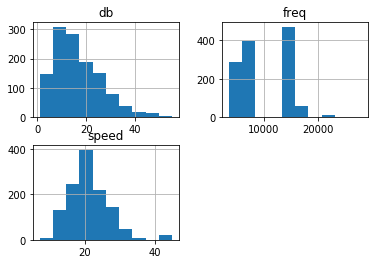

In [9]:
ve7cc.hist()

Overall, where are we receiving stations from?

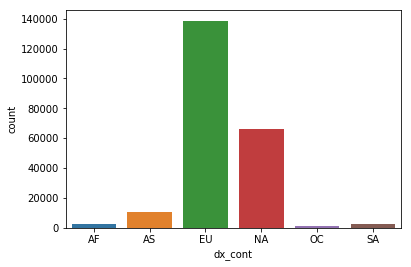

In [10]:
# data['dx_cont'].sample(n=2000).plot(type='bar')
sns.countplot(x='dx_cont', data=data)

How does that compare with where VE7CC is receiving stations from?

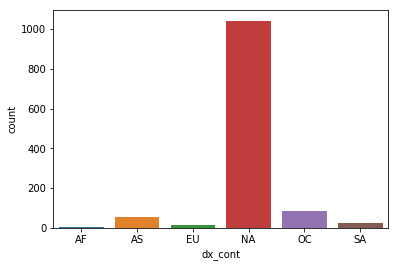

In [11]:
sns.countplot(x='dx_cont', data=ve7cc)

This graph shows counts from VE7CC, over the day, by band.

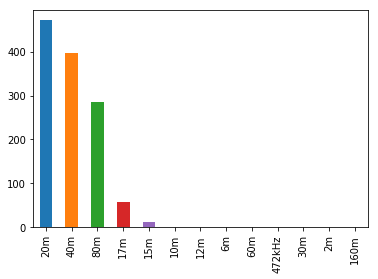

In [12]:
ve7cc.band.value_counts().plot(kind='bar')

Here's the same graph for all data.

It would be nice to plot these two charts smaller, and side-by-side.

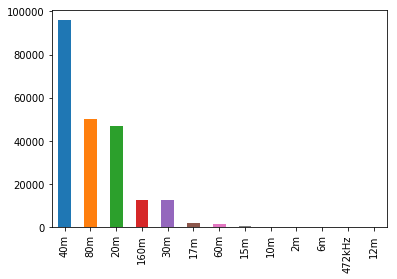

In [13]:
data.band.value_counts().plot(kind='bar')

# Closer...

## A very busy graph

Let's try plotting db over day, hue set to band.

This is very close to what I'm after.

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


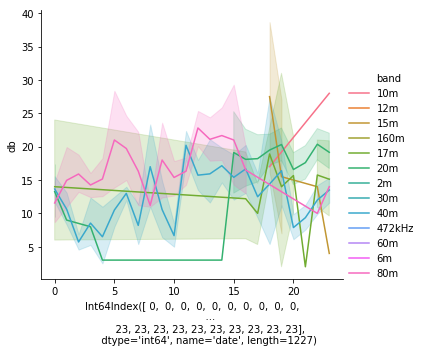

In [14]:
# This is very close to what I'm after.
sns.relplot(x=ve7cc.index.hour, y="db", kind="line", hue="band", data=ve7cc);

##  An interesting table

This gets me a nice table -- but everything is counted, and none of the individual
data points are preserved.  This might be better done by copying this to a separate dataframe

In [15]:
ve7cc.groupby([ve7cc.index.hour, ve7cc.band]).count().fillna(0)

callsign  de_pfx  de_cont  freq    dx  dx_pfx  dx_cont  mode  \
date band                                                                   
0    10m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     12m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     15m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     160m         0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     17m          3.0     3.0      3.0   3.0   3.0     3.0      3.0   3.0   
     20m         15.0    15.0     15.0  15.0  15.0    15.0     15.0  15.0   
     2m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     30m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     40m         46.0    46.0     46.0  46.0  46.0    46.0     46.0  46.0   
     472kHz       0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     60m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     6m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     80m         16.0    16.0     16.0  16.0  16.0    16.0     16.0  16.0   
1    10m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     12m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     15m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     160m         0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     17m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     20m          1.0     1.0      1.0   1.0   1.0     1.0      1.0   1.0   
     2m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     30m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     40m         25.0    25.0     25.0  25.0  25.0    25.0     25.0  25.0   
     472kHz       0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     60m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     6m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     80m         19.0    19.0     19.0  19.0  19.0    19.0     19.0  19.0   
2    10m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     12m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     15m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     160m         0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
...               ...     ...      ...   ...   ...     ...      ...   ...   
21   472kHz       0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     60m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     6m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     80m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
22   10m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     12m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     15m          1.0     1.0      1.0   1.0   1.0     1.0      1.0   1.0   
     160m         0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     17m         12.0    12.0     12.0  12.0  12.0    12.0     12.0  12.0   
     20m         63.0    63.0     63.0  63.0  63.0    63.0     63.0  63.0   
     2m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     30m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     40m         33.0    33.0     33.0  33.0  33.0    33.0     33.0  33.0   
     472kHz       0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     60m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     6m           0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     80m          1.0     1.0      1.0   1.0   1.0     1.0      1.0   1.0   
23   10m          1.0     1.0      1.0   1.0   1.0     1.0      1.0   1.0   
     12m          0.0     0.0      0.0   0.0   0.0     0.0      0.0   0.0   
     15m 

Some tools that might work to group things by hour:

- Groupby:

```
# Groupby
eu_band_group = ve7cc.loc[ve7cc.dx_cont == 'EU'].groupby(pd.Grouper(key='band'))
eu_date_group = ve7cc.loc[ve7cc.dx_cont == 'EU'].groupby(pd.Grouper(level='date', freq='1h'))
```

- Resample:
```
hourly = data.resample(rule='H').mean()
```

Another approach is to use the built-in *masking* method for DataFrames.  Here we see which bands the skimmer VE7CC received non-North America DX on:

In [16]:
data[(data.dx_cont != 'NA') & (data.callsign == 'VE7CC')].band.unique()          

, 17m, 80m, 40m, 15m]
Categories (5, object): , 17m, 80m, 40m, 15m]

# Now I've got it!  Graph of activity by band and hour

## VE7CC 
Taking the approach outlined [here](https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe), I experimented with `reset_index`.  This sets the index back to just the record number.  

The `count()` at the end gives us a count of QSOs.  The count of the `db` column was arbitrary. It would make sense to rename that column. (Ditto `date`, which is now best called `hour`.)

The advantage to the reset index is that it seems to let Seaborn plot the hour (date) vs count (db).  Setting the col to band works a treat.

Setting `col_wrap` to 2, and `height` to 8, allows us to have relatively big graphs with lots of room to display them.

First we'll set up a couple of wrapper functions; after that, we'll start graphing different subsets of the data.

In [17]:
def group_by_hour(df):
    "Group dataframe by hour, summing by band and dx_continent"
    df = df['db'].groupby([df.index.hour, df.band, df.dx_cont]).count().fillna(0).reset_index()
    return df

def graph_by_hour(df):
    "Graph dataframe by hour, summing by band and dx_cont"
    sns.relplot(x='date', y='db', col='band', hue='dx_cont', col_wrap=2, kind='line', height=8, data=group_by_hour(df))

Let's start by graphing the stations received by VE7CC.

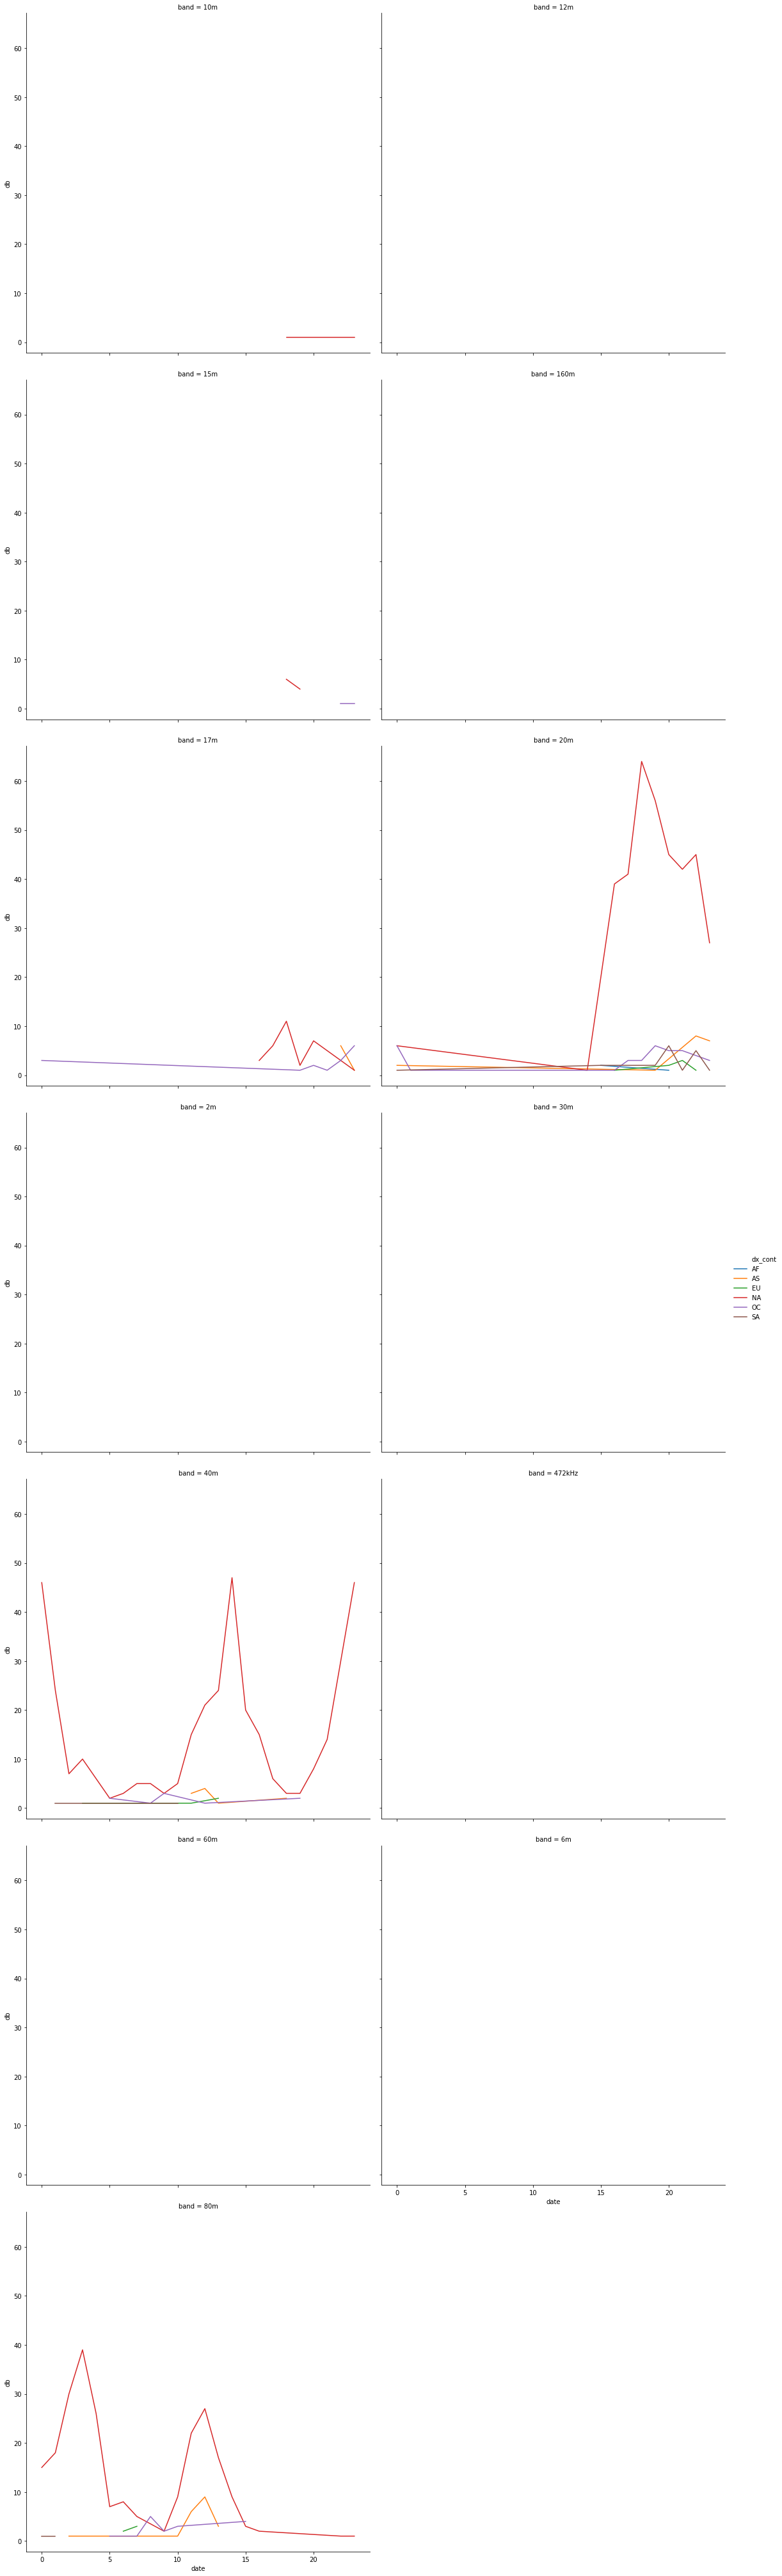

In [22]:
graph_by_hour(ve7cc)

## North American skimmers

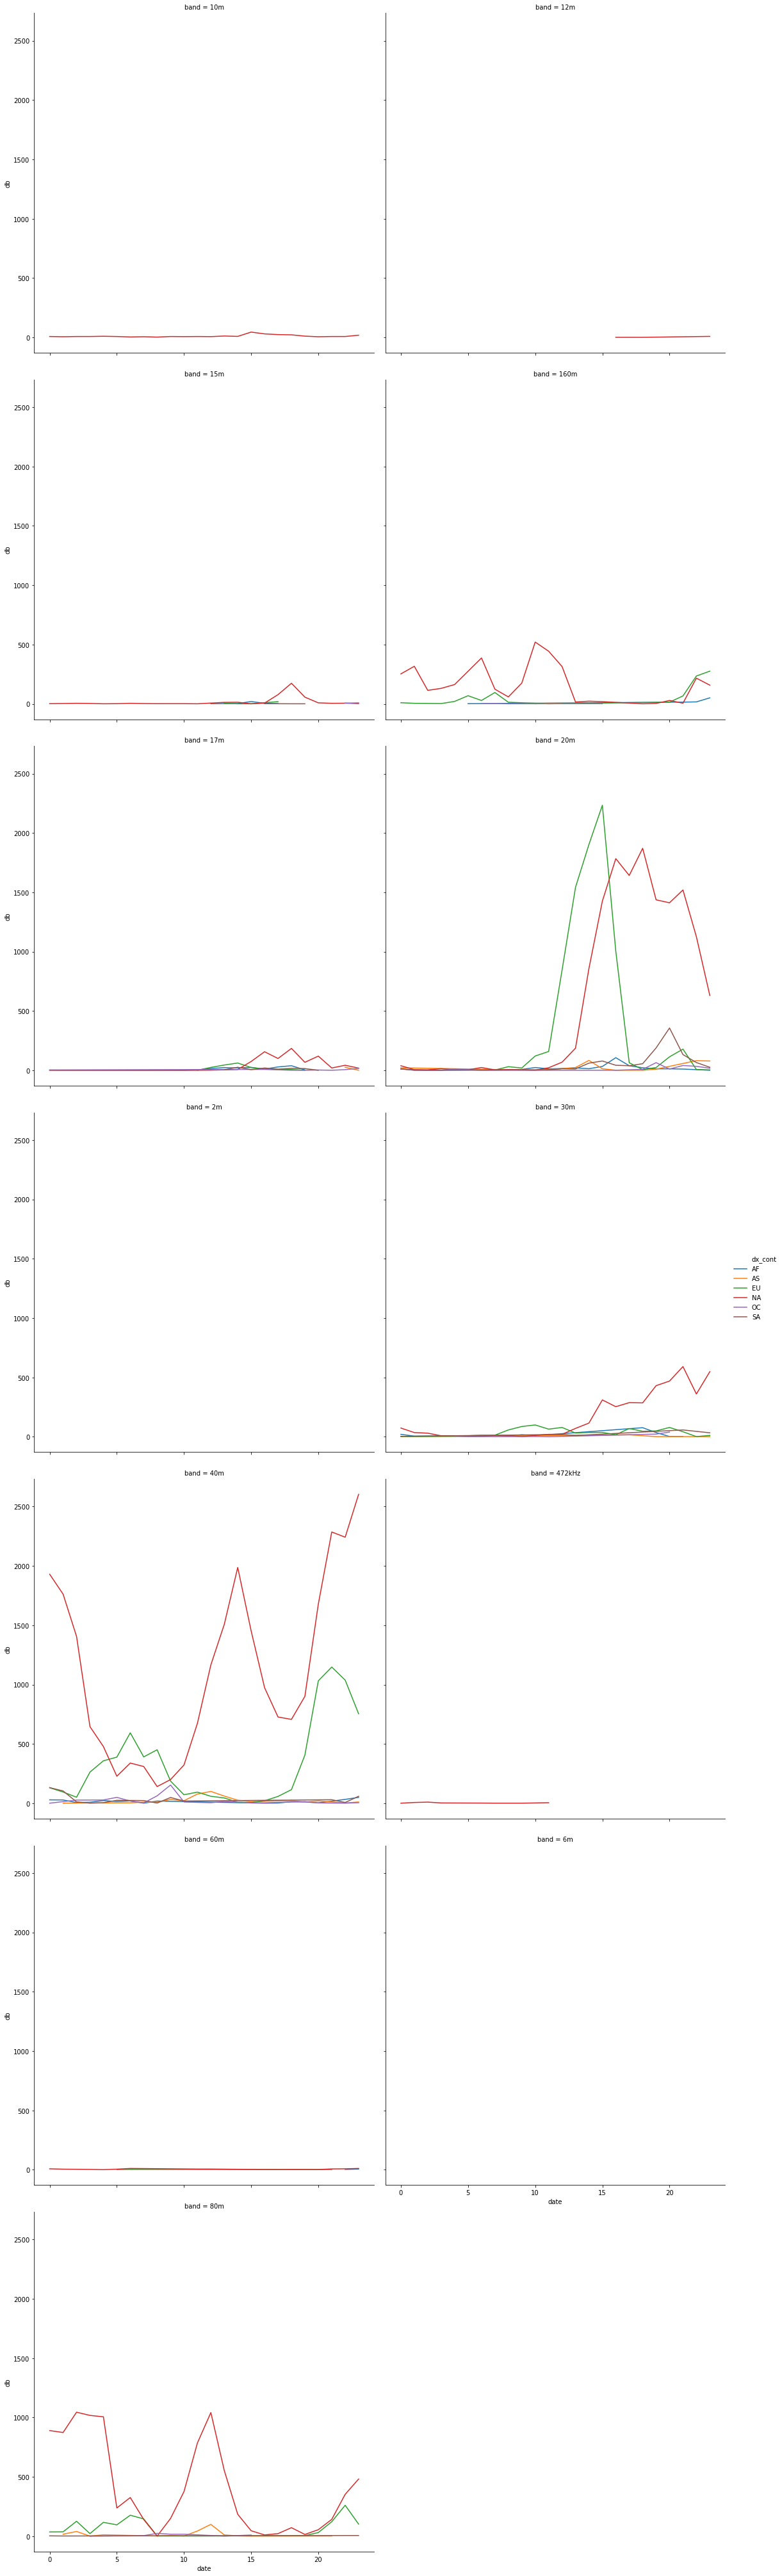

In [18]:
graph_by_hour(data.loc[data.de_cont == 'NA'])

## European skimmers

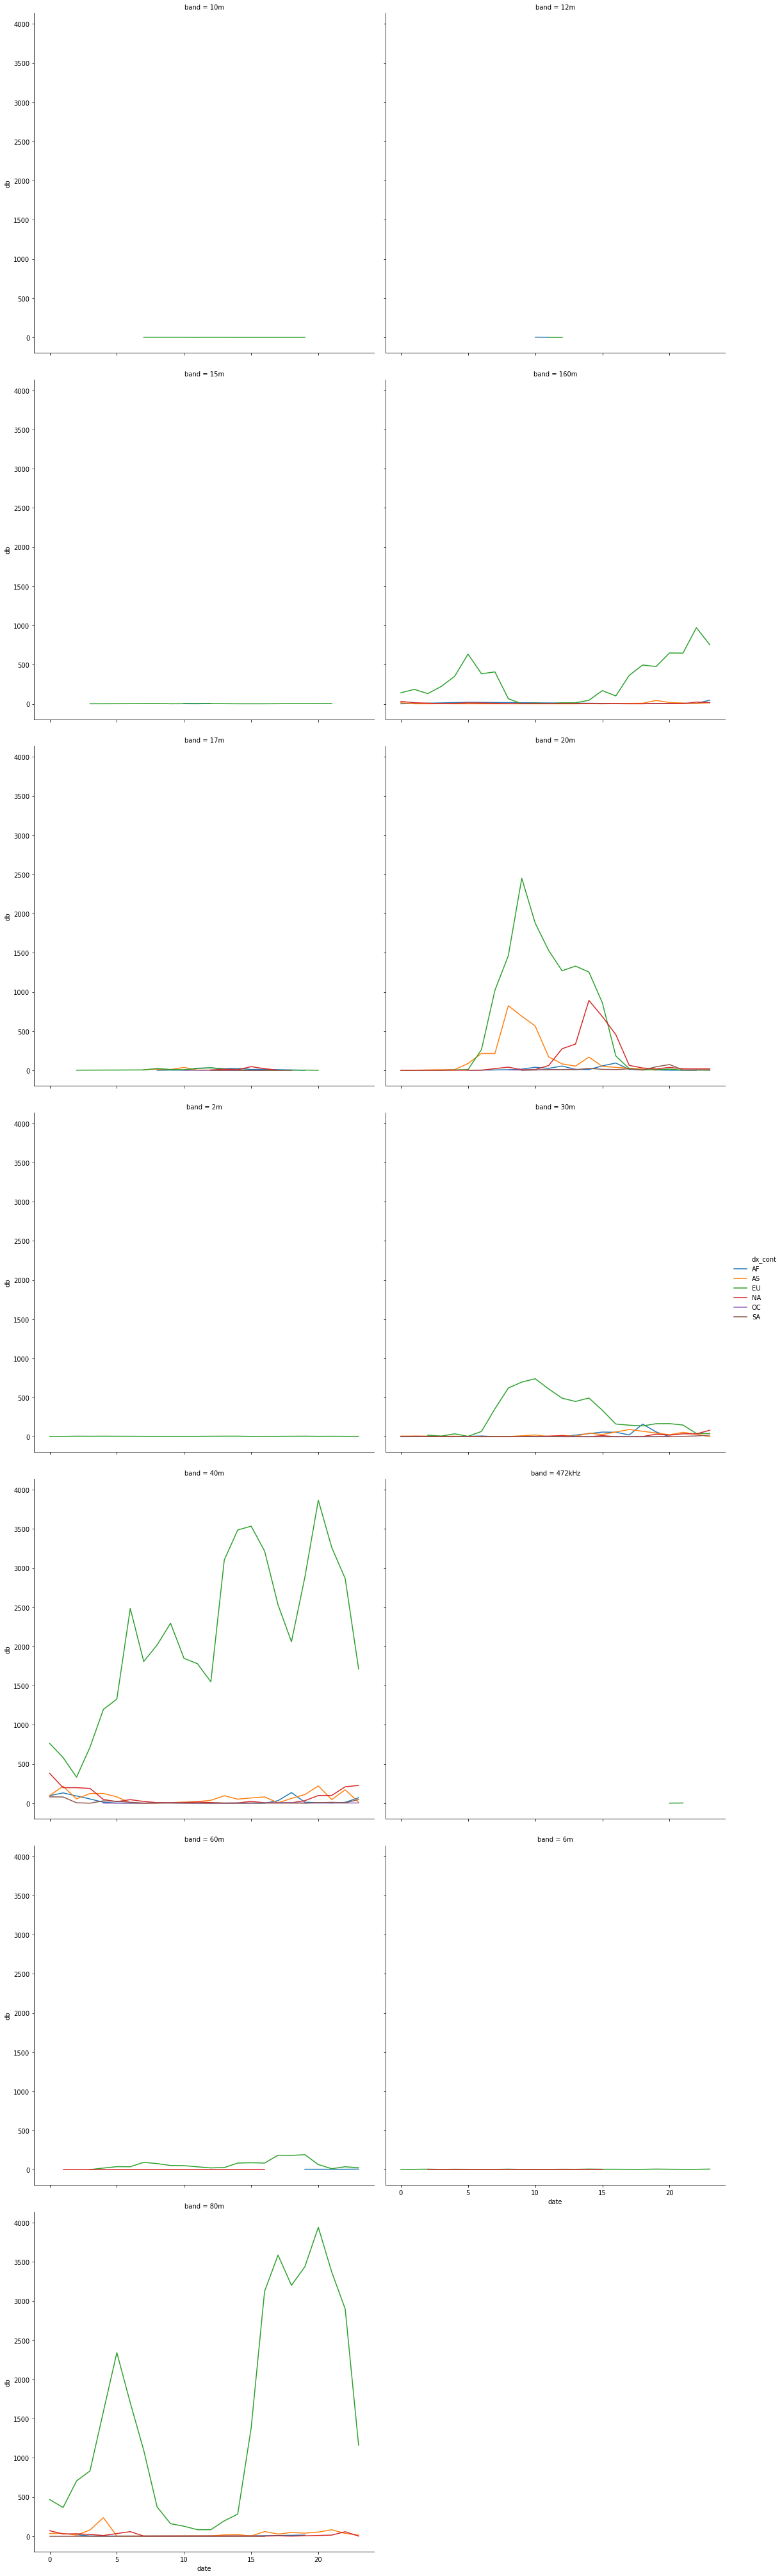

In [19]:
graph_by_hour(data.loc[data.de_cont == 'EU'])

# All skimmers

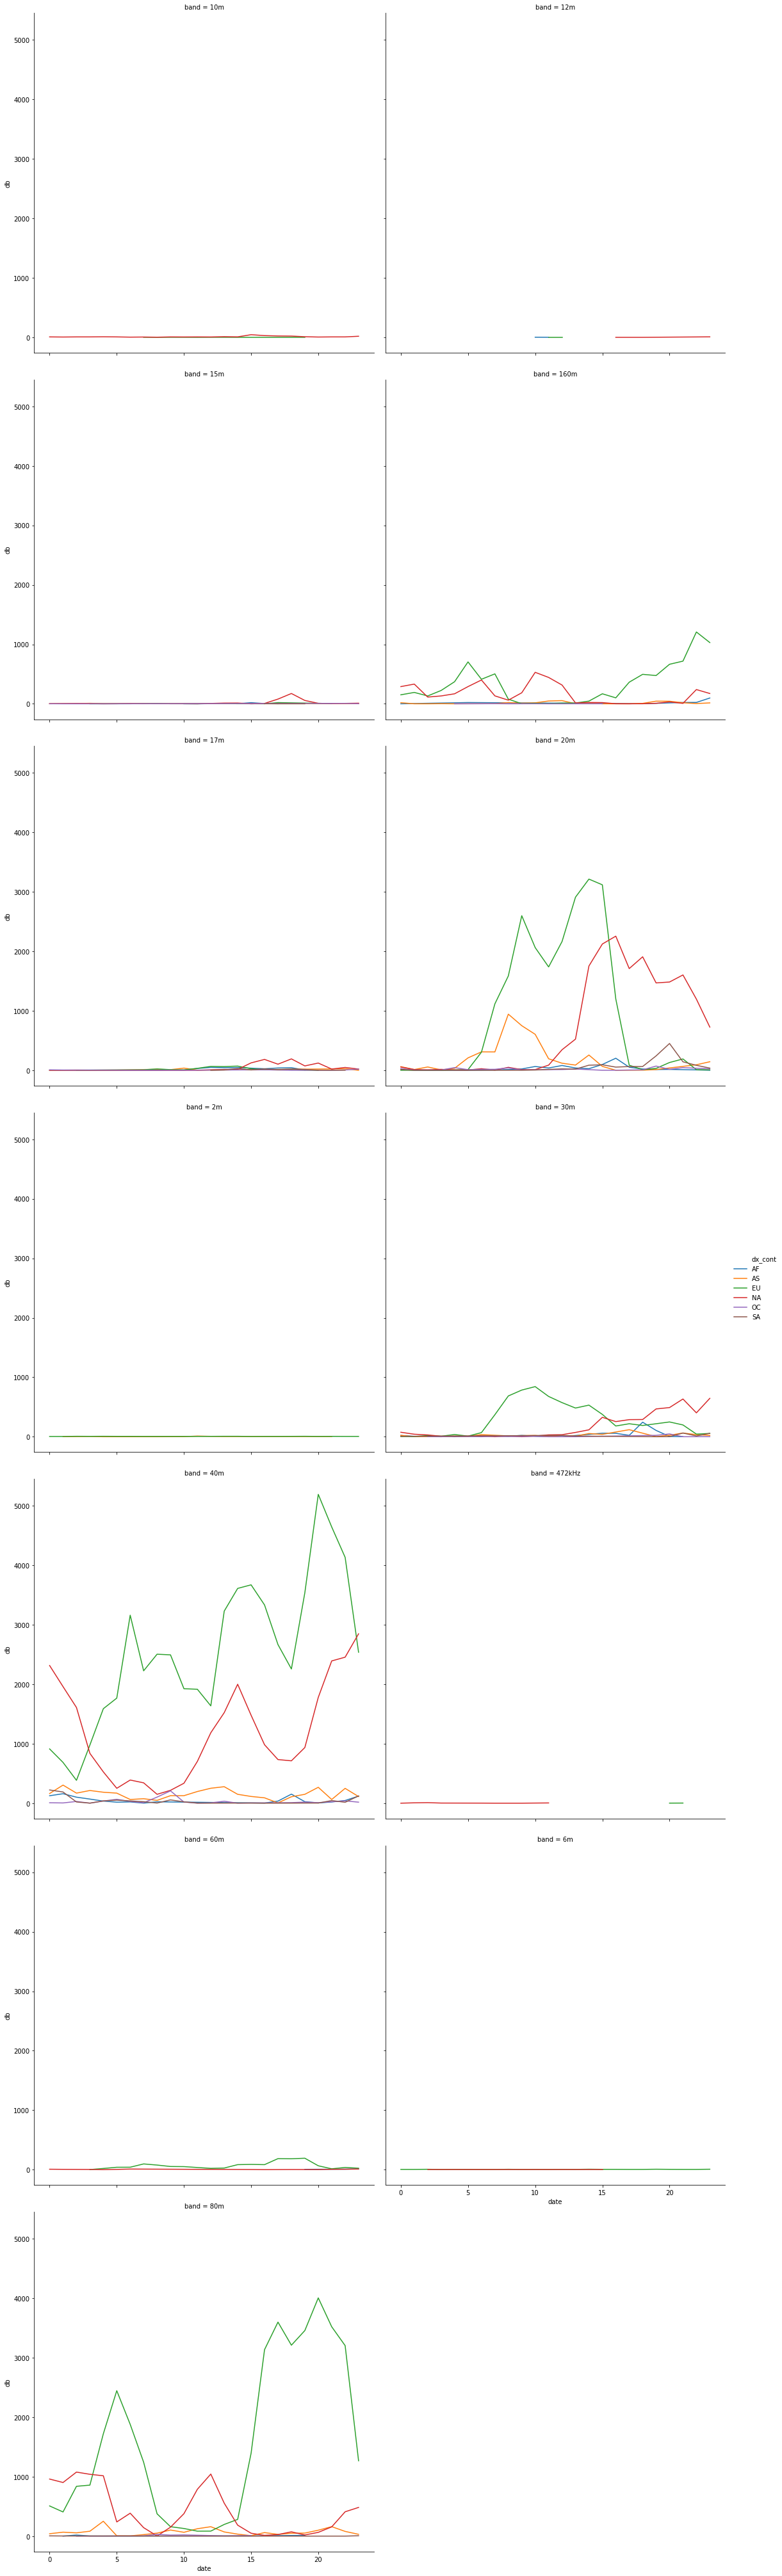

In [20]:
graph_by_hour(data)

Okay, interesting!  So now, some questions we can tackle next:

- Can we graph patterns by de_cont? It would be interesting to see, for example, how 20m shifts during the course of 24 hours.